## Colab 환경에서 하는 것을 권장합니다.

# 사전 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/TextMining_WordEmbedding

[Errno 2] No such file or directory: 'drive/MyDrive/TextMining_WordEmbedding'
/content


In [3]:
#konlpy 설치 (mecab 제외). 3~40초 정도 소요
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,540 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://se

In [4]:
# java 경로 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [71]:
# 필요 라이브러리 불러오기
import os, json
from tqdm.notebook import tqdm

from konlpy.tag import Okt
from konlpy.tag import Kkma, Komoran, Hannanum, Okt, Mecab

from gensim.models import Word2Vec

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
# data 불러오기
data_dir = '/content/drive/MyDrive/DSL/세션자료/[0830]TextMining_WordEmbedding/TextMining_WordEmbedding/data'

corpus = []
for i in tqdm(os.listdir(data_dir)):
    with open(os.path.join(data_dir, i), 'r') as f:
        json_data = json.load(f)
    corpus.append(json_data['sentences'])
corpus = sum(corpus, [])

  0%|          | 0/50 [00:00<?, ?it/s]

데이터를 확인하고 어떻게 전처리를 하고 토큰화를 해야 할 지 고민해보세요!

In [8]:
corpus[:50]

['대학과 산업계, 공공연구기관에서 일하는 기술경영 전문가 10명 중 7명은 박근혜 정부의 과학기술 정책이 실패했다고 평가하는 것으로 나타났다',
 '10명 중 8명은 과학기술 전담 부처의 필요성에 공감했다',
 '기술경영경제학회는 3일 이 같은 내용을 담은 ‘차기 정부 과학기술혁신 정책에 대한 설문 조사 결과’를 발표했다',
 '지난 10월17~23일 이뤄진 이 설문 조사에는 대학과 산업계, 공공연구기관에 종사하는 학회 소속 회원 160명이 참여했다',
 '응답자 중 69.4%가 정부 교체 때마다 바뀐 과학기술 정책이 모두 실패했다고 답했다',
 '과학기술처에서 과학기술부, 교육과학기술부를 거쳐 미래창조과학부로 전담 부처 이름을 바꾸고 정책 기조가 바뀌면서 일관성 있는 과학기술 정책을 추진하지 못했다는 것이다',
 '응답자의 66.9%는 창조경제를 내세운 현 정부의 과학기술 정책이 실패했다고 평가했다',
 '성공한 과학기술 정책을 편 정부를 꼽아달라는 질문에 응답자의 65%(104명)가 노무현 정부를, 22%(35명)는 김대중 정부를 선택했다',
 '과학기술 정책에서 가장 실패한 정부는 응답자 절반 이상인 56%(104명)가 박근혜 정부를, 36%(58명)가 이명박 정부를 꼽았다',
 '응답자의 78.8%는 차기 정부의 과학기술 전담 부처 설립 필요성에 공감했다',
 '21세기 컴퓨팅 콘퍼런스 서울 개최',
 '"기계-인간 합쳐 \'슈퍼맨\' 될 수 있어"',
 '"우리는 인공지능(AI)이 갖는 잠재력과 힘, 영향력을 모든 사람이 쉽게 사용하고 접근할 수 있도록 민주화하길 바랍니다"',
 "피터 리(Peter Lee) 마이크로소프트연구소 총괄 부사장은 2일 서울 서대문구 연세대에서 열린 '21세기 컴퓨팅 콘퍼런스 2016'에서 AI를 향한 미래 비전을 이같이 강조했다",
 "이 행사는 올해로 18번째로, '인간과 AI가 공존하는 시대'라는 주제로 열렸다",
 '한국에서 이 행사가 개최된 것은 2007년 이후 9년 만이다',
 "컨퍼런스 기조연설하는 피터 리 

# 1번

자신만의 CustomTokenization을 만들어보세요! 세션에서 말씀 드렸듯이 정답이 있는 것이 아닙니다. 

제가 세션에서 설명했던 것 처럼 pos를 이용하여 품사를 구하고 품사를 통해 stop words를 지정해서 제거해 줄 수 있고, 따로 stopw words를 지정해서 의미 없다고 생각하는 단어들을 제거해도 상관 없습니다!

물론 Okt말고 다른 Tokenizer를 사용해도 괜찮습니다. 

다양한 방법으로 전처리를 진행해보고 왜 그런 전처리와 tokenizing 방법을 사용했는지 설명해주세요!

[여러분의 설명]

In [9]:
okt = Okt()

In [15]:
import pandas as pd

In [18]:
stopwords = pd.read_table('/content/drive/MyDrive/DSL/세션자료/[0830]TextMining_WordEmbedding/TextMining_WordEmbedding/stopwords-ko.txt')

In [39]:
stopwords_list = stopwords['가'].values.tolist()

In [56]:
# 자신만의 tokenization, preprocess 규칙을 만들고 그 규칙에 맞는 CustomTokenizer를 만들어보세요.
# 한 문장을 input으로 받아 token이 들어있는 list를 반환하는 함수를 구현해보세요.
tokens = []
def CustomTokenization(sentence):
    nouns = okt.nouns(sentence)
    result = [word for word in nouns if not word in set(stopwords_list)]
    return result

In [57]:
# corpus_tokenized 안에 CustomTokenization의 return값이 들어 있는 2중 list를 만들어 보세요
corpus_tokenized = []
for i in tqdm(corpus):
    corpus_tokenized.append(CustomTokenization(i))

  0%|          | 0/1020 [00:00<?, ?it/s]

In [84]:
corpus_tokenized[2]

['기술',
 '학회',
 '내용',
 '차기',
 '정부',
 '과학기술',
 '혁신',
 '정책',
 '대한',
 '설문',
 '조사',
 '결과',
 '발표']

# 2번

이제 word2vec 모델을 학습시켜 봅시다!

1. 사전학습 없이 모델 학습
2. 사전학습 된 모델을 사용하여 학습

두가지를 진행해보세요

hyperparameter는 본인이 하고 싶으신 것으로 하면 됩니다. 단, 사전학습 된 모델을 사용할 때는 size = 200으로 맞추어 주세요!

hyperparameter 설정 기준을 설명해주세요!

[여러분의 설명]
- min_count =1 로 설정했다. 
- 학습을 위해 epoch 는 20으로 설정했다. 

In [134]:
# 사전학습 없이 모델 학습
# 모델 생성
model_no_pretrained = Word2Vec(min_count =1 , size = 200)

# 모델 vocabulary 추가
model_no_pretrained.build_vocab(corpus_tokenized)

total_examples = model_no_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_no_pretrained.wv.vocab))

현재 vocabulary size(V) : 2930


In [137]:
# 모델 학습
model_no_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 20)

(209094, 219880)

In [138]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_no_pretrained.wv.most_similar('논문')

[('특급', 0.997684121131897),
 ('시그널', 0.9969445466995239),
 ('최', 0.9968340396881104),
 ('사이언스', 0.99671471118927),
 ('라피', 0.9966713190078735),
 ('어플', 0.9966037273406982),
 ('링', 0.9965473413467407),
 ('시스', 0.9960536956787109),
 ('어드밴', 0.9960219264030457),
 ('게재', 0.995963454246521)]

In [139]:
model_no_pretrained.wv.most_similar('증강현실')

[('아바타', 0.9965894222259521),
 ('사용자', 0.994890034198761),
 ('가구', 0.993742048740387),
 ('공간', 0.9935041069984436),
 ('식탁', 0.9903824329376221),
 ('동작', 0.9897593855857849),
 ('이성희', 0.9875274896621704),
 ('가상공간', 0.980778694152832),
 ('고려', 0.9806579351425171),
 ('재현', 0.9805560111999512)]

In [140]:
model_no_pretrained.wv.vocab.keys()

dict_keys(['대학', '산업', '연구기관', '기술', '경영', '전문가', '명', '중', '박근혜', '정부', '과학기술', '정책', '평가', '전담', '부처', '필요성', '공감', '학회', '내용', '차기', '혁신', '대한', '설문', '조사', '결과', '발표', '지난', '종사', '소속', '회원', '참여', '응답', '교체', '답', '과학기술처', '과학기술부', '교육과학기술부', '미래창조과학부', '이름', '기조', '관성', '추진', '자의', '창조경제', '세운', '현', '편', '꼽아달', '질문', '노무현', '김대중', '선택', '가장', '절반', '이상인', '이명박', '꼽았다', '설립', '세기', '컴퓨팅', '콘퍼런스', '서울', '개최', '기계', '인간', '슈퍼맨', '수', '인공', '지능', '잠재력', '힘', '영향력', '모든', '사람', '사용', '접근', '민주화', '피터', '리', '마이크로소프트', '연구소', '총괄', '부사', '서대문구', '연세대', '향', '미래', '강조', '행사', '올해', '번', '공존', '시대', '주제', '한국', '이후', '만이', '컨퍼런스', '연설', '연합뉴스', '윤', '동진', '기자', '오전', '연세대학교', '대강', '차', '산업혁명', '변화', '관해', '나선', '세계', '기업', '연구', '투자', '목표', '세렌디피티', '단어', '제시', '연구개발', '운', '뜻밖', '이란', '뜻', '지속', '통해', '생각', '지도', '방법', '긍정', '혜택', '줄', '속도', '발전', '머신', '러닝', '관측', '구텐베르크', '독일', '활판', '인쇄', '술', '성서', '제작', '유럽', '인쇄업', '대중화', '인물', '라며', '고', '말', '대해', '아이디어', '시작', '며', '인류', '더',

In [69]:
import gensim

In [73]:
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/DSL/세션자료/[0830]TextMining_WordEmbedding/TextMining_WordEmbedding/ko.bin')

In [141]:
# 사전학습 된 모델을 사용하여 학습
#사전학습 된 모델 불러오기
pretrained = Word2Vec.load('/content/drive/MyDrive/DSL/세션자료/[0830]TextMining_WordEmbedding/TextMining_WordEmbedding/ko.bin')

print('Pretrained model의 단어 수(V) :', len(pretrained.wv.vocab))
print('Pretrained model의 embedding vector의 size(N) :', len(pretrained.wv['강아지']))

# 모델 생성
model_pretrained = Word2Vec(size = 200, min_count =1 )

# 모델 vocabulary 추가
model_pretrained.build_vocab(corpus_tokenized)

total_examples = model_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_pretrained.wv.vocab))

Pretrained model의 단어 수(V) : 30185
Pretrained model의 embedding vector의 size(N) : 200
현재 vocabulary size(V) : 2930


In [99]:
#pretrained model의 학습되어 있는 vocabulary list 불러오기
model_pretrained.build_vocab([list(pretrained.wv.vocab.keys())], update = True)
print('현재 vocabulary size(V) :', len(model_pretrained.wv.vocab))

#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model_pretrained.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

현재 vocabulary size(V) : 30715


In [146]:
# 모델 학습
model_pretrained.train(corpus_tokenized, total_examples = total_examples, epochs = 50)

(522265, 549700)

In [147]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_pretrained.wv.most_similar('논문')

[('시그널', 0.957732081413269),
 ('링', 0.9476451873779297),
 ('특급', 0.9405038952827454),
 ('칭찬', 0.939291775226593),
 ('발표', 0.9391629695892334),
 ('공동', 0.9388762712478638),
 ('설문', 0.9355610609054565),
 ('학회', 0.9355552792549133),
 ('어드밴', 0.9350348711013794),
 ('저자', 0.9321438074111938)]

# 3번

사전 학습 없이 모델을 학습해도 성능이 괜찮나요?   
사전 학습 없이 학습한 모델과 사전 학습이 된 모델을 사용한 모델 간의 성능 차이가 있었나요? 차이가 있었다면 어떤 부분에서 차이가 나고 왜 그런 차이가 났는지 생각해보고 설명해주세요!

사전 학습이 된 모델이 직관적으로 성능이 더 좋았다. 사전 학습이 안된 경우, '논문'과 유사한 단어들을 뽑았을 때 사람, 시스템, 효율, 데이터, 미국, 연구, 후, 은, 데, 크기 등 조사와 관련없는 단어도 뽑혔다. 

사전 학습이 된 모델의 경우 '논문'과 유사한 단어들로 학술지, 네이터, 책, 출판물, 기고문 등 매우 유사한 단어들이 뽑혔다. 

# 4번

이제 학습된 모델을 통해 나온 embedding 결과를 2차원, 3차원에 embedding 시켜 봅시다.    
사전학습된 데이터를 사용하면 너무 단어 수가 많아지기 때문에 우리가 처음에 가지고 있던 corpus_tokenized 데이터만 사용하겠습니다.   
PCA, t-SNE를 사용해서 시각화하고 그 두가지 방법의 결과를 비교해보세요!   

추가적으로 무언가 재미있는 시각화 결과 (ex. 이거랑 저거랑 비슷한 위치에 임베딩 됐어요!) 가 있다면 추가적으로 남겨주세요!

model_pretrained 로 k-means 클러스터 후 시각화 하니 군집화가 적절히 잘 된 것을 볼 수 있다.

In [112]:
import plotly
import plotly.graph_objs as go
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [148]:
# 시각화할 단어 리스트 생성
unique_text = list(set(sum(corpus_tokenized, [])))
len(unique_text)

2930

In [149]:
unique_text[:10]

['제어', '캐슬', '소재', '원시', '시리', '어드밴', '올해', '보트', '개인주의', '각광']

In [150]:
model_pretrained.wv['논문'].shape

(200,)

In [151]:
# embedding 결과 가져오기
word, vector = [], []
for i in unique_text:
    try:
      model_pretrained.wv[i]
    except KeyError:
      continue
    word.append(i)
    vector.append(model_pretrained.wv[i])

In [152]:
pca = PCA(random_state = 100, n_components= 2).fit_transform(vector)

In [124]:
tsne = TSNE(perplexity = 50,  learning_rate = 0.01).fit_transform(vector)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [154]:
from sklearn.cluster import KMeans #kmeans 군집화 후 클러스터
kmeans = KMeans(n_clusters=10, random_state=100).fit(tsne)
tag = kmeans.predict(tsne)

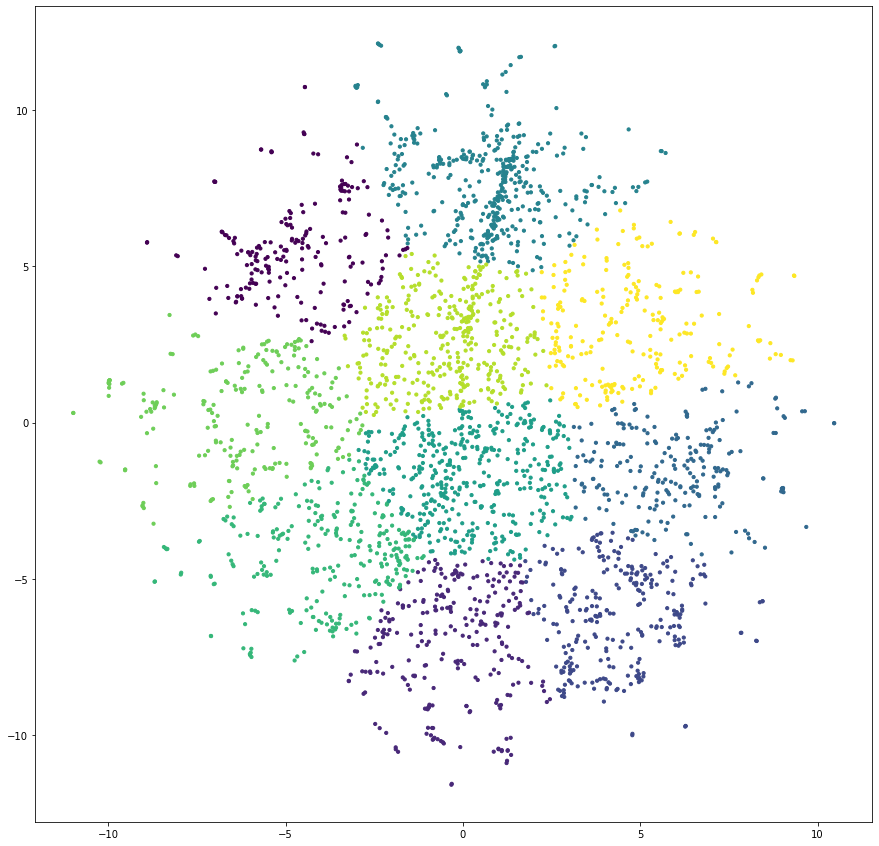

In [155]:
# 시각화해보세요!
plt.figure(figsize=(15,15))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=tag)
plt.show()


model_pretrained 로 k-means 클러스터 후 시각화 하니 군집화가 적절히 잘 된 것을 볼 수 있다.

# 5번

t-SNE에는 perplexity라는 hyperparameter가 존재했는데요. 5~50 사이의 값에서 robust 한 결과를 보인다고는 하지만 perplexity가 달라지면서 embedding 결과가 미묘하지만 크게 바뀌기도 합니다. perplexity와 n_iter 조합을 달리해보면서 perplexity의 변화가 embedding결과에 어떤 영향을 미치는지 살펴보세요!

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



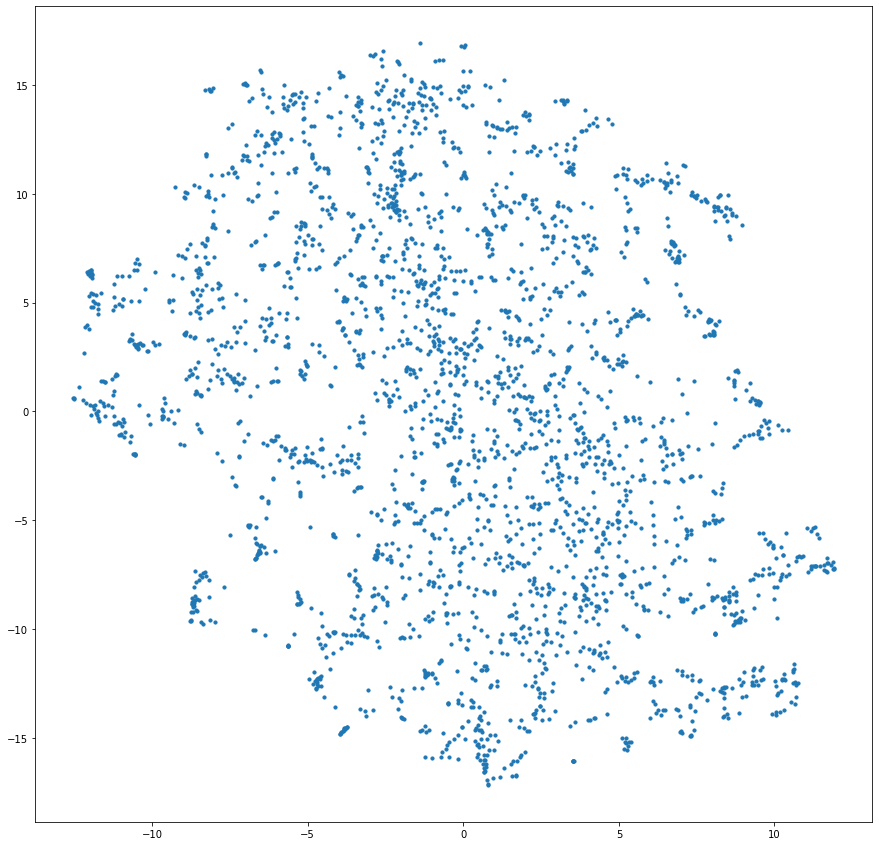

In [157]:
# t-SNE
tsne = TSNE(perplexity = 30, n_iter = 300).fit_transform(vector)

# 시각화
plt.figure(figsize=(15,15))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



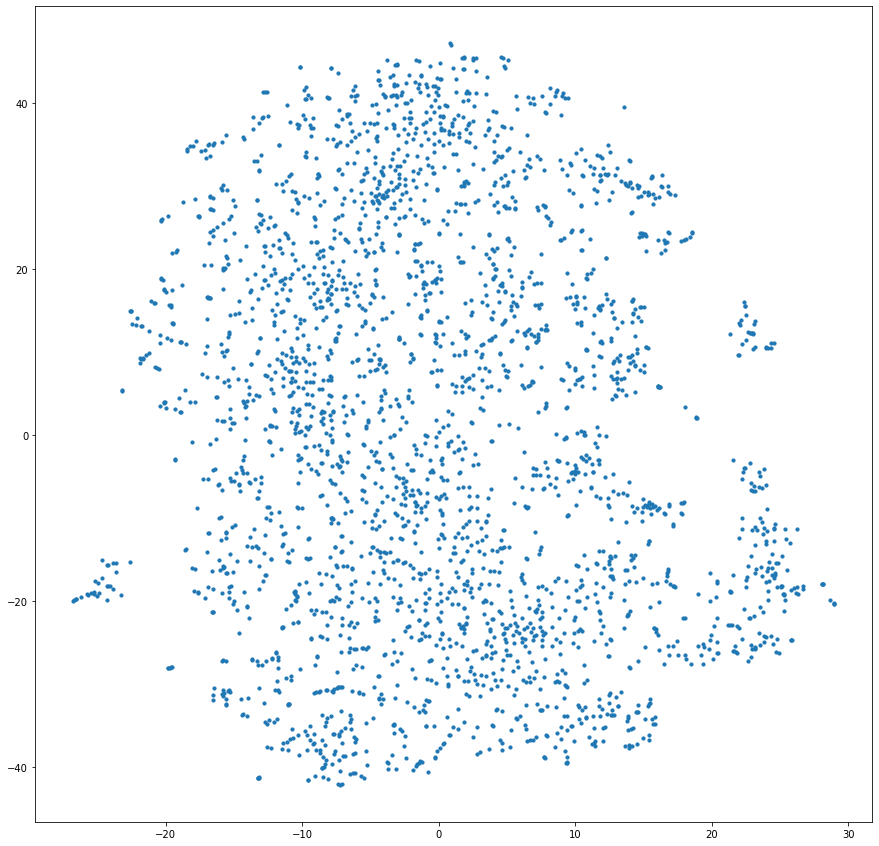

In [158]:
# t-SNE
tsne = TSNE(perplexity = 50, n_iter = 500).fit_transform(vector)

# 시각화
plt.figure(figsize=(15,15))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10)
plt.show()


# 수고하셨습니다!